
# Building a Network from Wikipedia Pages

* [Pipeline to extract a network from Wikipedia.](https://github.com/VictorNGomes/Directed_Networks_From_Wikipedia_Pages/blob/main/notebooks/Pipeline.ipynb )

* [Week 07 Video 01 - Building a Network from Wikipedia Pages](https://youtu.be/EhOhCdkgmxs)

* [Week 07 Video 02 - Snowballing process to collect Wikipedia pages](https://youtu.be/RdU6Kj9N_ow)

In [1]:
!pip install wikipedia


from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import seaborn as sns


nx.__version__

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=5fe2e1f266bb06440c105a491c9e71ce40959616c3c48b5f2010a924a26dbccd
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


'3.5'

In [2]:
#!pip install scipy==1.8

In [3]:
SEED = "Duel Links".title()
STOPS = ("Yu-Gi-Oh! video games",
         "Digital collectible card games",
         "Multiplayer online games",
         "2016 video games",
         "Free-to-play video games",
         "Android (operating system) games",
         "IOS games",
         "Video games developed in Japan",
         "Konami games")


In [4]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [5]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [6]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]


print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))


0 Duel Links
1 Akiza Izinski
1 Android (Operating System)
1 Aster Phoenix
1 Axel Brodie
1 Bandit Keith
1 Bastion Misawa
1 Blair Flannigan
1 Bonz


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Bonz
1 Bronk Stone
Could not load Bronk Stone
1 Chazz Princeton
1 Chinese Language
1 Computing Platform
1 Crow Hogan
1 Digital Collectible Card Game
1 Duke Devlin
1 English Language
1 Espa Roba
1 Free-To-Play
1 French Language
1 Game Engine
1 German Language
1 Ghouls (Yu-Gi-Oh!)
1 Ios
Could not load Ios
1 Ipados
Could not load Ipados
1 Ishizu Ishtar
1 Italian Language
1 Jack Atlas
1 Jaden Yuki
1 Japan
1 Japanese Language
1 Joey Wheeler
1 Jump Force
Could not load Jump Force
1 Jump Super Stars
1 Jump Ultimate Stars
1 Kazuki Takahashi
1 Konami
Could not load Konami
1 Konami Holdings Corporation
1 Korean Language
1 Leo (Yu-Gi-Oh! 5D'S)
1 Lumis And Umbra
1 Luna (Yu-Gi-Oh! 5D'S)
1 Mai Valentine
Could not load Mai Valentine
1 Mako Tsunami
1 Maximillion Pegasus
1 Metacritic
1 Microsoft Windows
1 Microtransactions
1 Mokuba Kaiba
1 Odion
1 Paradox Brothers
1 Player Versus Player
1 Pocket Gamer
1 Portuguese Language
1 Red Ventures
1 Rex Raptor
1 Russian Language
1 Seto Kaiba
1 Sol

In [7]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

17559 nodes, 38441 edges


In [8]:

page = 'Duel Links'.title()
wiki = wikipedia.page(page)
len(wiki.links)

174

In [9]:
# make a copy of raw graph
original = g.copy()

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

[('Video Game Genre', 'Video Game Genres'), ('Nazca Line', 'Nazca Lines'), ('Operating System', 'Operating Systems'), ('Video Game Console', 'Video Game Consoles'), ('Austronesian Language', 'Austronesian Languages'), ('Chinese Classifier', 'Chinese Classifiers'), ('Dialect', 'Dialects'), ('Diphthong', 'Diphthongs'), ('Loanword', 'Loanwords'), ('Mongol', 'Mongols'), ('Sino-Tibetan Language', 'Sino-Tibetan Languages'), ('Video Game', 'Video Games'), ('Affricate', 'Affricates'), ('Allophone', 'Allophones'), ('Celtic Language', 'Celtic Languages'), ('Germanic Language', 'Germanic Languages'), ('Indo-European Language', 'Indo-European Languages'), ('North Germanic Language', 'North Germanic Languages'), ('Plosive', 'Plosives'), ('Proto-Indo-European', 'Proto-Indo-Europeans'), ('U', 'Us'), ('West Frisian Language', 'West Frisian Languages'), ('West Germanic Language', 'West Germanic Languages'), ('Yes–No Question', 'Yes–No Questions'), ('Browser Game', 'Browser Games'), ('Microtransaction',

In [10]:
degree = [drg for node , drg in g.degree()]
print(f'Max degree : {max(degree)}' )
print(f'Min degree : {min(degree)}' )

Max degree : 1554
Min degree : 1


<Axes: ylabel='Count'>

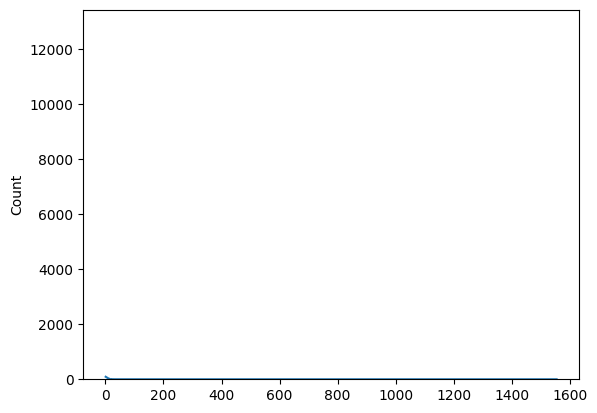

In [12]:
sns.histplot(data=degree, kde=True)

In [13]:
#filter nodes with degree greater than 2
#core decompo = 3
core = [node for node, drg in dict(g.degree()).items() if drg > 2 ]
degrees = [drg for node, drg in dict(g.degree()).items() if drg > 2 ]

In [14]:
subgraf_g = nx.subgraph(g,core)
print(f'Nodes: {len(subgraf_g)} edges: {nx.number_of_edges(subgraf_g)}')
nx.write_graphml(subgraf_g, "network_analysis.graphml")

Nodes: 1960 edges: 20093


In [15]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(subgraf_g)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(subgraf_g)/nx.number_of_edges(g))))
print("Original Average of edges by node: {:.2f}".format(nx.number_of_edges(g)/len(g)))
print("Subgraph Average of edges by node: {:.2f}".format(nx.number_of_edges(subgraf_g)/len(subgraf_g)))

Nodes removed: 88.79%
Edges removed: 47.63%
Original Average of edges by node: 2.19
Subgraph Average of edges by node: 10.25


In [16]:
import numpy as np
from collections import  Counter

In [17]:
Counter(degrees)

Counter({151: 3,
         217: 3,
         1018: 1,
         220: 8,
         203: 6,
         1161: 1,
         328: 1,
         268: 2,
         1241: 1,
         202: 8,
         142: 2,
         1227: 1,
         342: 1,
         1294: 1,
         11: 15,
         5: 122,
         205: 4,
         1125: 1,
         13: 15,
         224: 2,
         1386: 1,
         754: 1,
         206: 5,
         104: 2,
         784: 1,
         824: 1,
         513: 1,
         36: 2,
         558: 1,
         678: 1,
         190: 2,
         207: 2,
         178: 1,
         938: 1,
         390: 1,
         212: 1,
         111: 1,
         1183: 1,
         71: 1,
         1474: 1,
         204: 1,
         919: 1,
         567: 1,
         33: 2,
         99: 1,
         514: 1,
         6: 67,
         233: 1,
         357: 1,
         1554: 1,
         105: 1,
         392: 1,
         241: 1,
         285: 1,
         291: 6,
         252: 1,
         254: 4,
         188: 2,
         

In [18]:
top_indegree = sorted(dict(subgraf_g.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]

print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

105 Yu-Gi-Oh! Trading Card Game
105 Yu-Gi-Oh!
104 Jump Force
104 Yu-Gi-Oh! Duel Monsters Season 1
103 Yu-Gi-Oh! Zexal Ii Season 3
103 Yu-Gi-Oh! Nightmare Troubadour
103 Yu-Gi-Oh! Bonds Beyond Time
103 Yu-Gi-Oh! Zexal Ii Season 1
103 Yu-Gi-Oh! Arc-V Season 1
103 Yu-Gi-Oh! 5D'S Season 4
103 Yu-Gi-Oh! The Movie: Pyramid Of Light
103 Yu-Gi-Oh! Worldwide Edition: Stairway To The Destined Duel
103 Yu-Gi-Oh! (1998 Tv Series)
103 Yu-Gi-Oh! The Dawn Of Destiny
103 Yu-Gi-Oh! Arc-V Season 2
103 Yu-Gi-Oh! Arc-V (Manga)
103 Yu-Gi-Oh! Legacy Of The Duelist
103 Yu-Gi-Oh! The Eternal Duelist Soul
103 Yu-Gi-Oh! (1999 Film)
103 Yu-Gi-Oh! Go Rush!! Season 3
103 Yu-Gi-Oh! The Duelists Of The Roses
103 Yu-Gi-Oh! Forbidden Memories
103 Yu-Gi-Oh! Early Days Collection
103 Yu-Gi-Oh! Vrains Season 1
103 Yu-Gi-Oh! Gx
103 Yu-Gi-Oh! Vrains
103 Yugi Mutou
103 Jump Super Stars
103 Yu-Gi-Oh! 5D'S Season 1
103 Yu-Gi-Oh! R
103 Yu-Gi-Oh! Master Duel
103 Yu-Gi-Oh! Duel Links
103 Yu-Gi-Oh! Sevens
103 Yu-Gi-Oh! Go Rush!! 

<Axes: ylabel='Count'>

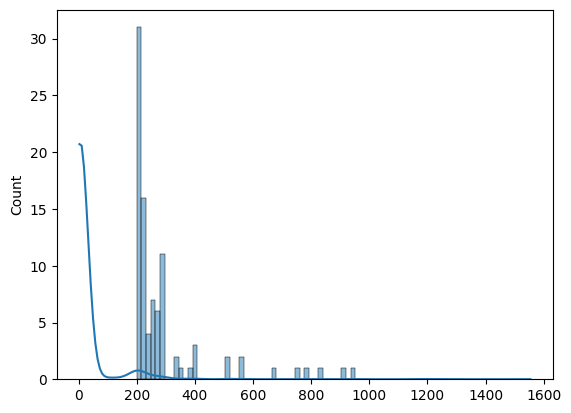

In [20]:
sns.histplot(data=degrees,kde = True,bins=np.histogram_bin_edges(degrees,50,range = (200,1000)))

# degree_centrality

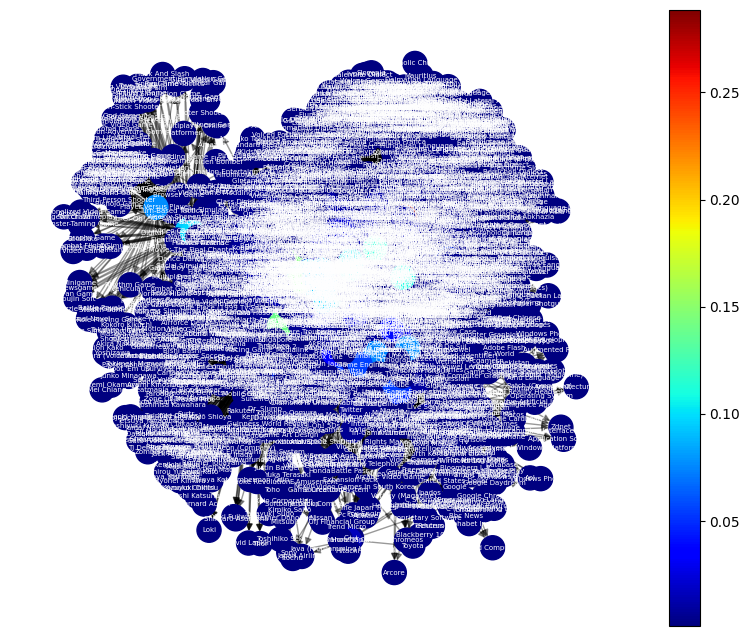

In [21]:
#the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=8375,k=0.2)
# color of nodes
color = list(dict(nx.degree_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white',
                        font_size = 5,
                        ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

# - Closeness Centrality

In [22]:
nx.closeness_centrality(g)

{'Duel Links': 0.0,
 'Akiza Izinski': 5.717552887364208e-05,
 'Android (Operating System)': 0.0037197239001997,
 'Aster Phoenix': 5.717552887364208e-05,
 'Axel Brodie': 5.717552887364208e-05,
 'Bandit Keith': 0.002099476066370383,
 'Bastion Misawa': 5.717552887364208e-05,
 'Blair Flannigan': 5.717552887364208e-05,
 'Bonz': 5.717552887364208e-05,
 'Bronk Stone': 5.717552887364208e-05,
 'Chazz Princeton': 5.717552887364208e-05,
 'Chinese Language': 0.0030374076818198733,
 'Computing Platform': 0.003627716595247764,
 'Crow Hogan': 5.717552887364208e-05,
 'Digital Collectible Card Game': 0.0026256874589644943,
 'Duke Devlin': 0.002099476066370383,
 'English Language': 0.0038165196894242273,
 'Espa Roba': 5.717552887364208e-05,
 'Free-To-Play': 0.0031589039890926682,
 'French Language': 0.003139583475397912,
 'Game Engine': 0.0029166016944747646,
 'German Language': 0.0032591866554130705,
 'Ghouls (Yu-Gi-Oh!)': 5.717552887364208e-05,
 'Ios': 0.003708270511466644,
 'Ipados': 0.00274216845716

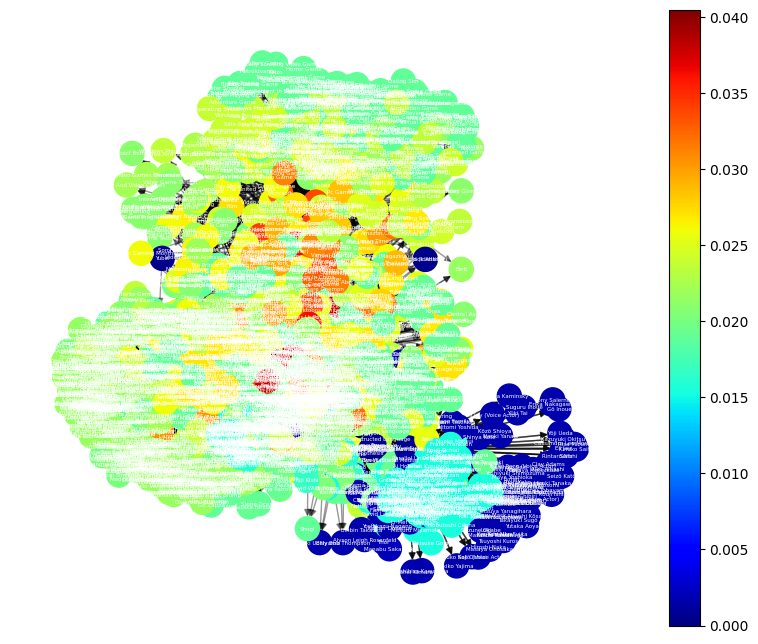

In [23]:

# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

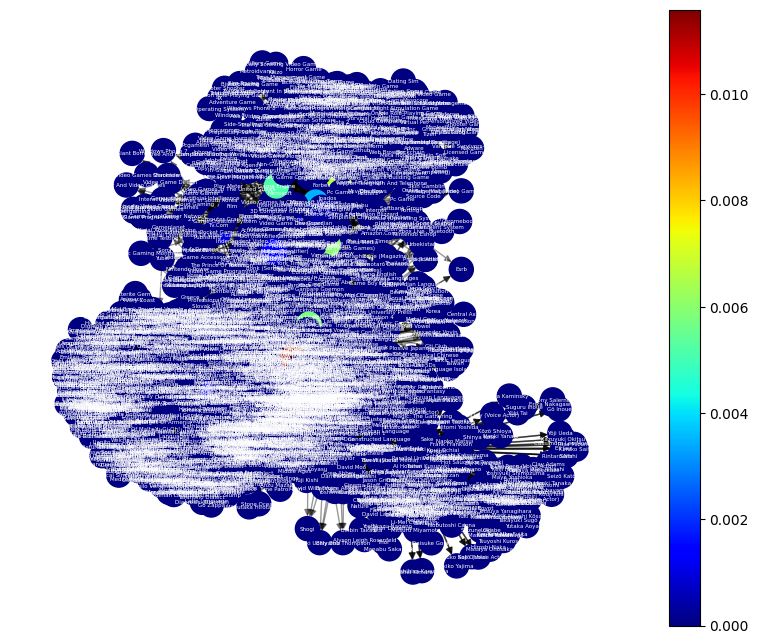

In [24]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

KeyboardInterrupt: 

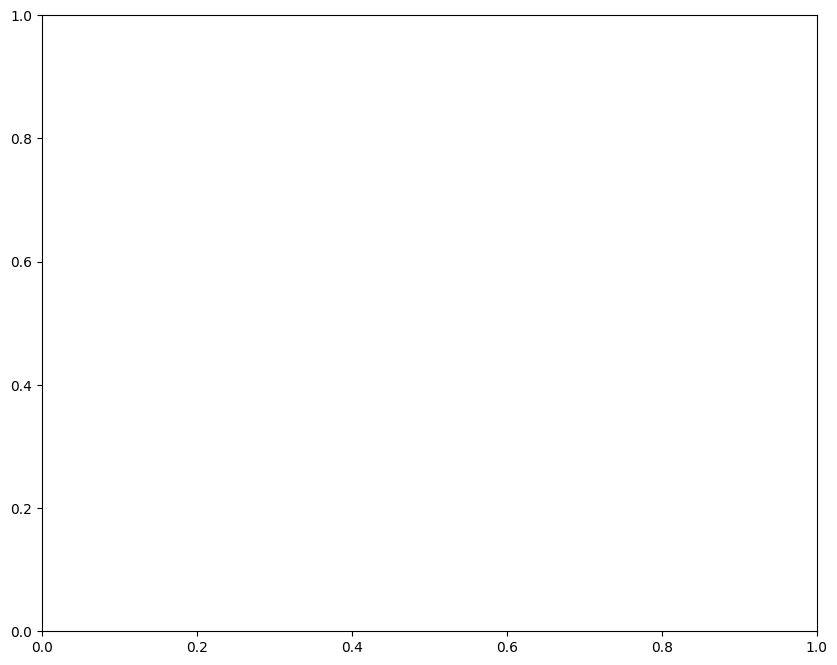

In [26]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

In [27]:
import pandas as pd

In [28]:
bc = pd.Series(nx.betweenness_centrality(subgraf_g))
dc = pd.Series(nx.degree_centrality(subgraf_g))
ec = pd.Series(nx.eigenvector_centrality(subgraf_g))
cc = pd.Series(nx.closeness_centrality(subgraf_g))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.000000,0.009699,6.259150e-04,0.016096
1,0.000000,0.001531,3.169349e-03,0.030403
2,0.000000,0.010720,3.202975e-02,0.019710
3,0.000000,0.001531,5.278661e-11,0.001633
4,0.000202,0.098520,1.109306e-01,0.025675


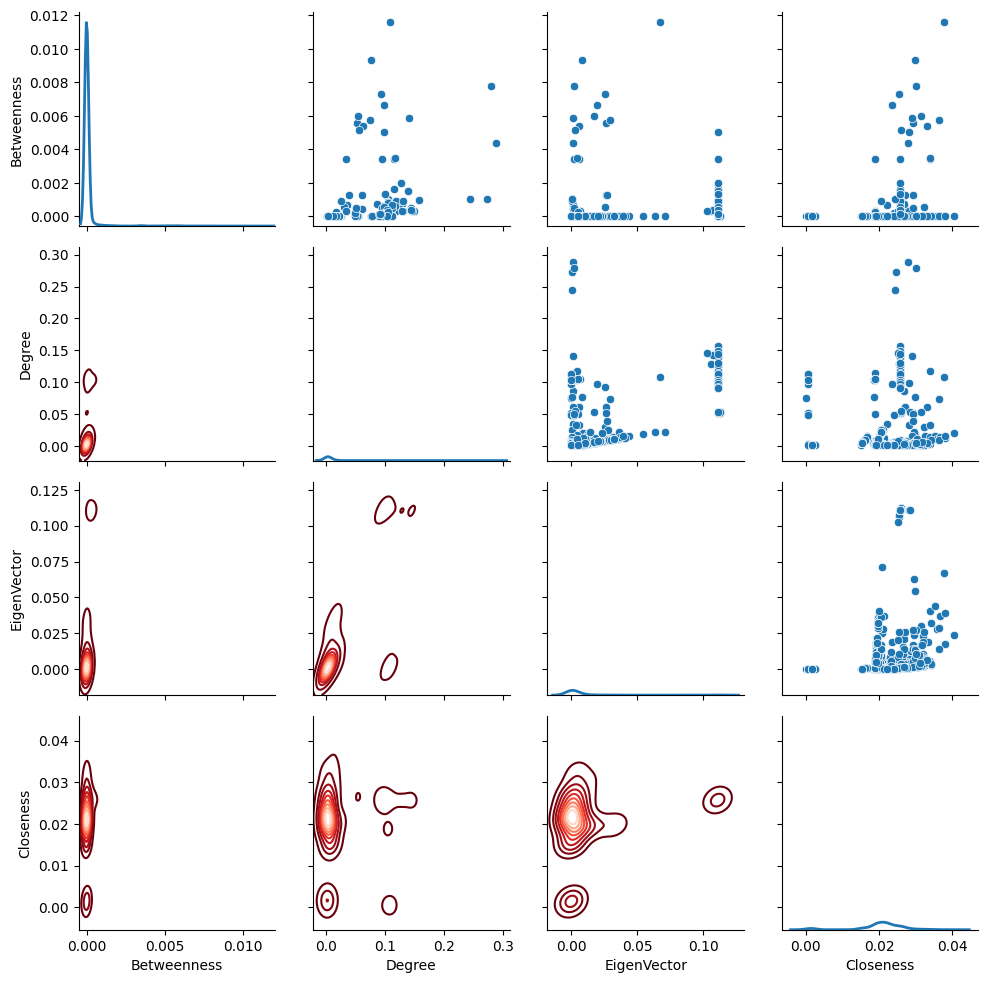

In [29]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)


plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

In [30]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(subgraf_g).items()])

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 38,
 39,
 41,
 42,
 44,
 50,
 72,
 73,
 74,
 75,
 76,
 125}

In [31]:
import matplotlib.patches as mpatches

<ipython-input-32-8644f9c2ce29>:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


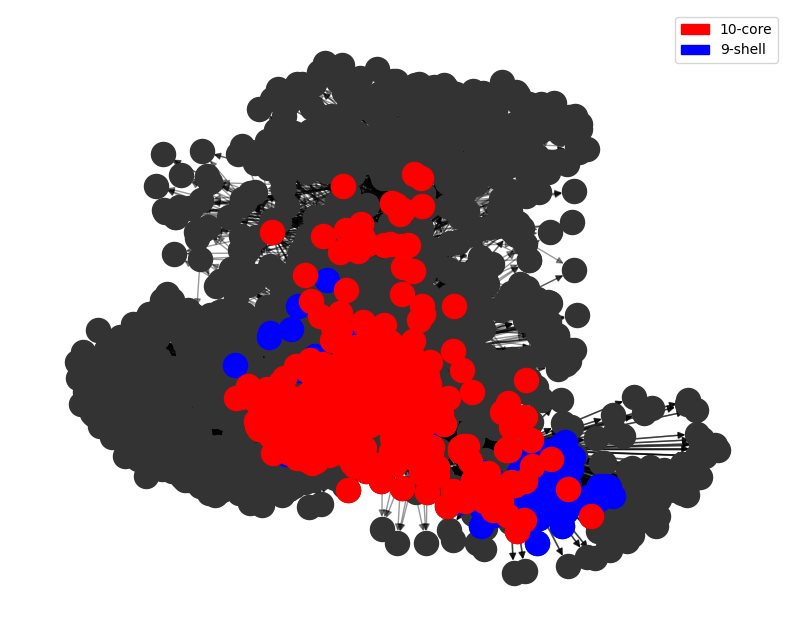

In [32]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g2_core_9 = nx.k_shell(subgraf_g, 9)
g2_core_10 = nx.k_core(subgraf_g, 10)

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g2_core_9,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g2_core_10,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='10-core')
blue_patch = mpatches.Patch(color='blue', label='9-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

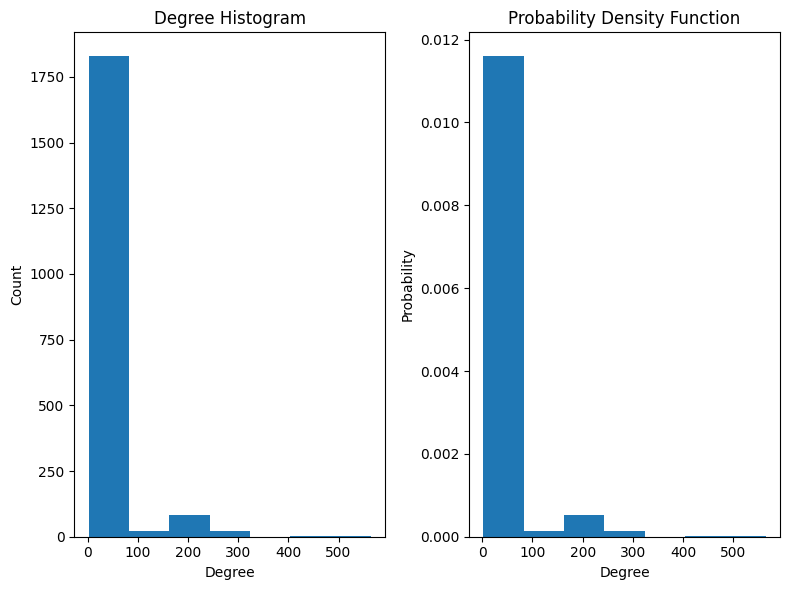

In [33]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in subgraf_g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

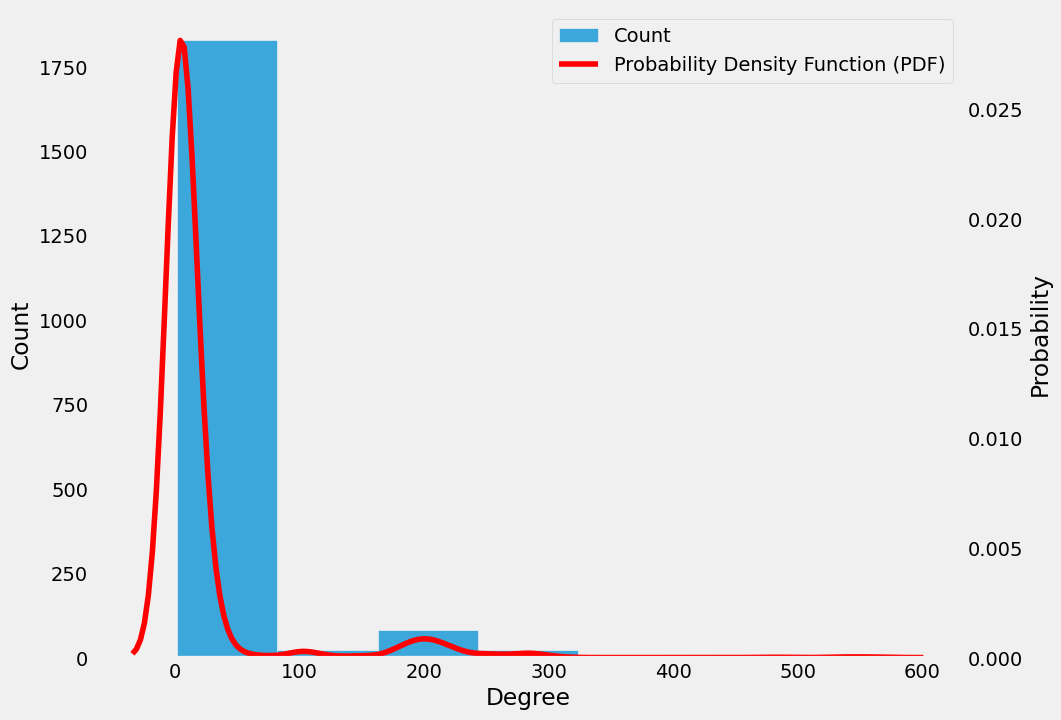

In [34]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

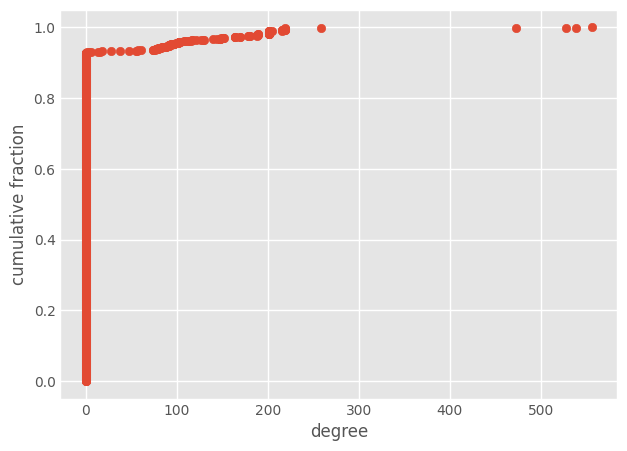

In [35]:
plt.style.use("ggplot")

# Another way to visualize the cumulative distribution
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("degree")
    plt.ylabel("cumulative fraction")


#
# insighs
# cdf(1) - almore 40% of vertices has degree 1
# cdf(2) P(degree <= 2) - 50% of vertices has at least degree 2 or less
# cdf(6) P(degree <= 6) - more than 95% of vertices has at least degree 6 or less
ecdf_degree(subgraf_g)